Liczba zdjęć dla wariantu Geo: 3187840
Liczba zdjęć dla wariantu World: 4289538
Liczba zdjęć dla wariantu Modis: 260
Całkowity rozmiar danych dla wariantu Geo: 921.05 TB
Całkowity rozmiar danych dla wariantu World: 920.56 TB
Całkowity rozmiar danych dla wariantu Modis: 18.05 GB


C:\Users\zbldo\AppData\Local\Temp\ipykernel_18076\3379002850.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=labels, y=data_sizes, palette=['blue', 'green', 'red'], ax=ax)


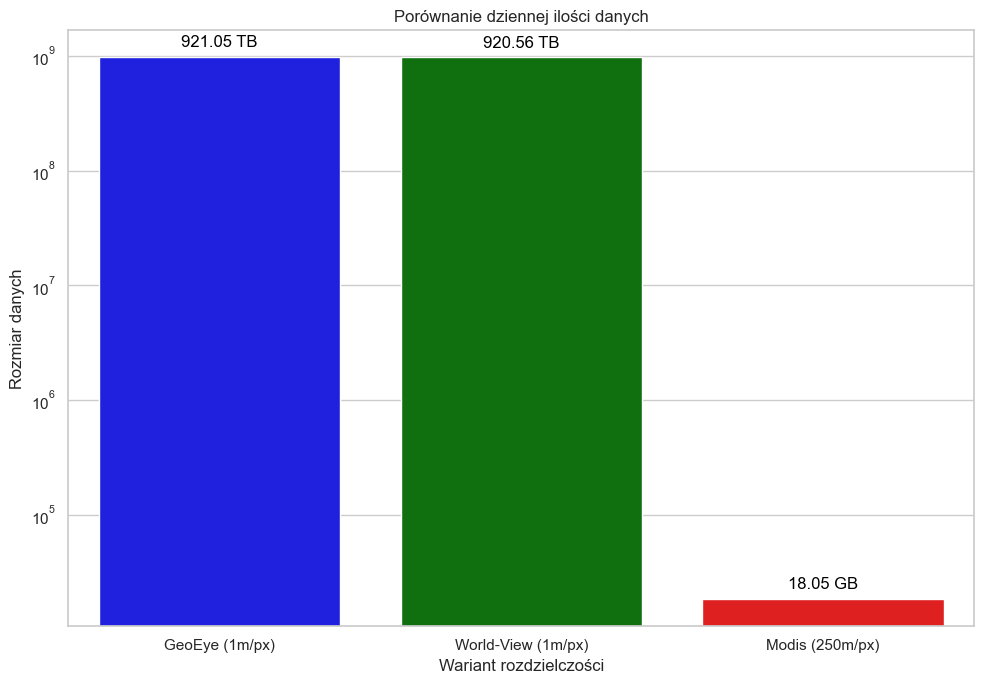

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Funkcja formatująca rozmiar danych z MB do odpowiednich jednostek
def format_size(mb):
    if mb >= 1024*1024*1024:
        return f"{mb/(1024*1024*1024):.2f} PB"
    elif mb >= 1024*1024:
        return f"{mb/(1024*1024):.2f} TB"
    else:
        return f"{mb:.2f} MB"

# Funkcja formatująca rozmiar danych dla MODIS – przeliczamy MB na GB
def format_size_modis(mb):
    return f"{mb/1024:.2f} GB"  # 1 GB = 1024 MB

# Stałe: przybliżony obwód Ziemi w kierunku Y i X [km]
obwod_y = 14878  # km
obwod_x = 40070  # km

# Zakres widzenia sensora (w km)
zakres_widzenia_Geo = 15.2
zakres_widzenia_World = 13.1
zakres_widzenia_MODIS = 1762.3

# Obliczenie liczby zdjęć dla wariantu Geo
liczba_zdjec_x_Geo = math.ceil(obwod_x / (0.9 * zakres_widzenia_Geo))
liczba_zdjec_y_Geo = math.ceil(1 + (obwod_y - zakres_widzenia_Geo) / (0.9 * zakres_widzenia_Geo))
liczba_zdjec_Geo = liczba_zdjec_x_Geo * liczba_zdjec_y_Geo

# Obliczenie liczby zdjęć dla wariantu World
liczba_zdjec_x_World = math.ceil(obwod_x / (0.9 * zakres_widzenia_World))
liczba_zdjec_y_World = math.ceil(1 + (obwod_y - zakres_widzenia_World) / (0.9 * zakres_widzenia_World))
liczba_zdjec_World = liczba_zdjec_x_World * liczba_zdjec_y_World

# Obliczenie liczby zdjęć dla wariantu MODIS
liczba_zdjec_x_Modis = math.ceil(obwod_x / (0.9 * zakres_widzenia_MODIS))
liczba_zdjec_y_Modis = math.ceil(1 + (obwod_y - zakres_widzenia_MODIS) / (0.9 * zakres_widzenia_MODIS))
liczba_zdjec_MODIS = liczba_zdjec_x_Modis * liczba_zdjec_y_Modis

# Przykładowe informacje o rozmiarze zdjęć (w MB) dla poszczególnych sensorów
rozmiar_Geo = 302.96
rozmiar_World = 225.03  
rozmiar_Modis = 86.60

# Obliczenie całkowitego rozmiaru danych dla całodzinnego pokrycia (w MB)
calkowity_rozmiar_Geo = rozmiar_Geo * liczba_zdjec_Geo
calkowity_rozmiar_World = rozmiar_World * liczba_zdjec_World
calkowity_rozmiar_Modis = rozmiar_Modis * liczba_zdjec_MODIS

# Wyświetlenie wyników w konsoli z przeliczeniem jednostek
print("Liczba zdjęć dla wariantu Geo:", liczba_zdjec_Geo)
print("Liczba zdjęć dla wariantu World:", liczba_zdjec_World)
print("Liczba zdjęć dla wariantu Modis:", liczba_zdjec_MODIS)
print("Całkowity rozmiar danych dla wariantu Geo:", format_size(calkowity_rozmiar_Geo))
print("Całkowity rozmiar danych dla wariantu World:", format_size(calkowity_rozmiar_World))
print("Całkowity rozmiar danych dla wariantu Modis:", format_size_modis(calkowity_rozmiar_Modis))

# Przygotowanie danych do wykresu
labels = ['GeoEye (1m/px)', 'World-View (1m/px)', 'Modis (250m/px)']
# Przechowujemy wartości w MB – ale etykiety formatujemy osobno
data_sizes = [calkowity_rozmiar_Geo, calkowity_rozmiar_World, calkowity_rozmiar_Modis]
data_labels = [
    format_size(calkowity_rozmiar_Geo),
    format_size(calkowity_rozmiar_World),
    format_size_modis(calkowity_rozmiar_Modis)
]

# Wykres z użyciem Seaborn i Matplotlib – stosujemy skalę logarytmiczną dla osi Y
fig, ax = plt.subplots(figsize=(10, 7))
barplot = sns.barplot(x=labels, y=data_sizes, palette=['blue', 'green', 'red'], ax=ax)
ax.set_title('Porównanie dziennej ilości danych')
ax.set_xlabel('Wariant rozdzielczości')
ax.set_ylabel('Rozmiar danych')
ax.set_yscale('log')

# Dodanie etykiet z przeliczonymi wartościami nad każdym słupkiem
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.annotate(data_labels[i],
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()
